# Entrega 4 - Modelos de segmentación


**Integrantes:**

+ Integrante 1: Neidan Martinez : neidan.martinez2201@ubiobio.cl
+ Integrante 2: Jean Muñoz : jean.munoz2201@ubiobio.cl
+ Integrante 3: Benjamin Escobar : Benjamin.escobar2201@ubiobio.cl


**Fecha de Creación: 10 Junio 2025

**Versión:** 1.0  



---

## Descripción


Este notebook contiene el desarrollo de la evaluación 4 de la asignatura de Inteligencia Artificial de la carrera de Ingeniería en Informática - Sede Concepción

---

## Requisitos de Software

Este notebook fue desarrollado con Python 3.9. A continuación se listan las bibliotecas necesarias:

- numpy (2.0.2)
- pandas (2.2.2)
- matplotlib (3.10.0)
- seaborn (0.13.2)

Para verificar la versión instalada ejecutar usando el siguiente comando, usando la librería de la cual quieres saber la versión:

```bash
import pandas as pd
print(pd.__version__)
````

In [ ]:
!wget https://raw.githubusercontent.com/JaznaLaProfe/InteligenciaArtificial/main/data/datos_segmentacion.csv

--2025-07-11 03:49:31--  https://raw.githubusercontent.com/JaznaLaProfe/InteligenciaArtificial/main/data/datos_segmentacion.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 159876 (156K) [text/plain]
Saving to: ‘datos_segmentacion.csv.2’

datos_segmentacion. 100%[===================>] 156.13K  --.-KB/s    in 0.01s   

2025-07-11 03:49:31 (11.2 MB/s) - ‘datos_segmentacion.csv.2’ saved [159876/159876]



In [ ]:
!pip install kneed

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

from kneed import KneeLocator

# Objetivos



## Contexto de Negocio para Segmentación

**Nombre del proyecto:** Segmentación de Usuarios de una App de Bienestar Integral

**Contexto:**
Una startup tecnológica ha desarrollado una aplicación móvil llamada **ViveFit**, orientada a mejorar el bienestar de las personas mediante el monitoreo de su actividad física y calidad del descanso.

A través de sensores y autodiagnóstico diario, la aplicación recolecta las siguientes variables continuas para cada usuario:

* `actividad_fisica`: horas promedio de ejercicio semanal.
* `pasos_diarios`: promedio de pasos diarios registrados.
* `calorias_gastadas`: estimación promedio de calorías quemadas por actividad.
* `horas_de_sueno`: promedio de horas de sueño nocturno.
* `nivel_descanso`: índice (numérico) que refleja cuán descansado se siente el usuario (basado en sueño y hábitos).

**Objetivo de análisis:**
La empresa desea **segmentar a sus usuarios** para personalizar recomendaciones, notificaciones y planes de entrenamiento. El equipo de analítica ha decidido aplicar técnicas de **reducción de dimensionalidad con PCA**, con el fin de visualizar la estructura de los datos y mejorar la calidad de segmentación.

---

## Actividades

### Modelo usando 2 variables
1. Justificar la selección de 2 variables **(5 puntos)**
2. Elegir la cantidad óptima de clusters **(3 puntos)**
3. Aplicar **KMeans** usando 2 variables y evaluar la calidad de los grupos generados. **(2 puntos)**
4. Visualizar los grupos generados mostrando los centroides de cada grupo. **(3 puntos)**
5. Mostrar los **centroides en escala original**. **(3 puntos)**
6. Interpretar un **centroide en escala original**. **(3 puntos)**
### Modelo usando 4 o más variables
7. Justificar la selección de las variables **(5 puntos)**
8. Elegir la cantidad óptima de clusters **(3 puntos)**
9. Aplicar **KMeans** usando las variables seleccionadas y evaluar la calidad de los grupos generados. **(2 puntos)**
10. Mostrar los **centroides en escala original**. **(3 puntos)**
11. Interpretar un **centroide en escala original**. **(3 puntos)**
12. **Aplicar PCA** sobre los datos escalados y argumentar cuántos componentes principales retendrán. **(5 puntos - 1 punto aplicar PCA y 4 por argumentar correctamente)**
13. Visualizar la **varianza explicada acumulada** para justificar la elección. **(2 puntos)**
14. Mostrar los **centroides en escala original**. **(3 puntos)**



---

## Penalizaciones
+ Ausencia de datos de autores - 10% de la calificación final
+ Falta de aplicación de buenas prácticas - 10% de la calificación final
* Faltas en redacción y ortografía - 10% de la calificación final

---


In [ ]:
data_frame = pd.read_csv("datos_segmentacion.csv")
data_frame.head()

,actividad_fisica,pasos_diarios,calorias_gastadas,horas_de_sueno,nivel_descanso
0,5.75,11278.26,2230.18,7.40,75.74
1,4.79,9358.50,1886.49,7.48,76.19
2,5.97,11045.24,2328.88,7.55,70.77
3,7.28,14404.04,2924.86,8.16,84.53
4,4.65,9663.95,1979.23,6.98,62.32


In [ ]:
data_frame.shape

(5000, 5)

✅  **Interpretación**

+ Se analizan una cantidad de 5000 datos, los cuales poseen 5 caracteristicas.

In [ ]:
data_frame.dtypes

,0
actividad_fisica,float64
pasos_diarios,float64
calorias_gastadas,float64
horas_de_sueno,float64
nivel_descanso,float64


## Modelo de segmentación usando 2 variables

### Selección y justificación de variables

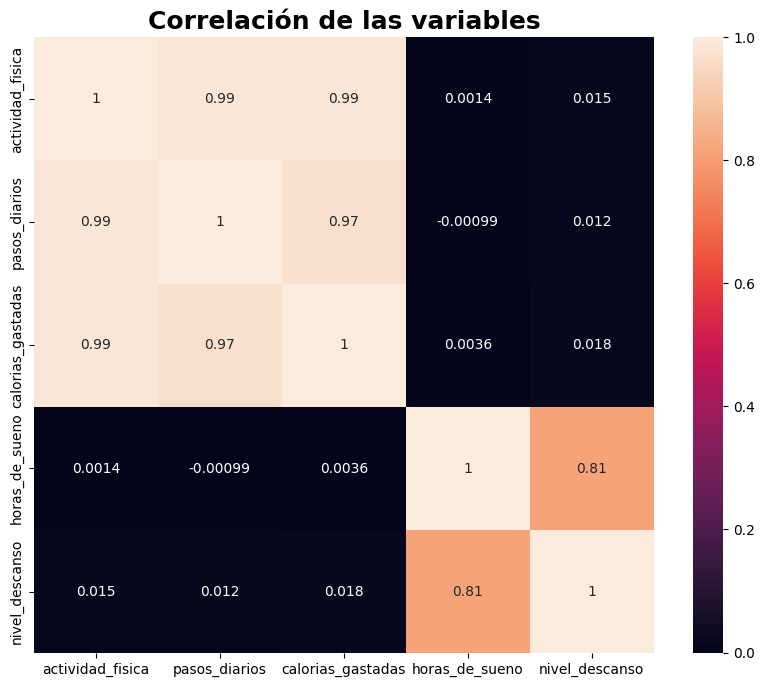

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(data_frame.corr(), annot=True)
plt.title("Correlación de las variables", fontsize=18, fontweight="bold")
plt.show()

In [ ]:
# Calcular la matriz de correlación
matriz_correlacion = data_frame.corr()

# Extraer la fila (o columna) correspondiente
correlacion = matriz_correlacion['actividad_fisica']

# Convertir a DataFrame y ordenar
df_correlacion = pd.DataFrame(correlacion).rename(columns={'actividad_fisica': 'correlacion'})
df_correlacion = df_correlacion.sort_values(by='correlacion', ascending=False)

# Mostrar
print(df_correlacion)

                   correlacion
actividad_fisica      1.000000
calorias_gastadas     0.986319
pasos_diarios         0.986005
nivel_descanso        0.014582
horas_de_sueno        0.001389


---
✅ **Interpretación**

---

+ Se seleccionan actividad_fisica y horas_de_sueno por su complementariedad: la primera mide el nivel de actividad física del usuario, y la segunda su percepción subjetiva de descanso, combinando así salud física y calidad de sueño. Además baja correlación directa entre sí, lo que permite una segmentación más informativa y evitar que una variable duplique información de otra.





In [ ]:
features = ['actividad_fisica', 'horas_de_sueno']
data_frame_simple = data_frame[features].copy()

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data_frame_simple)

### Elección del número de cluster óptimo

In [ ]:
sse = []
for k in range(2, 21):
  kkmeans = KMeans(n_clusters=k, n_init="auto", random_state = 29).fit(X_scaled)
  sse.append(kkmeans.inertia_)
kl = KneeLocator(range(2, 21), sse, curve="convex", direction="decreasing")

print("El codo está en k =", kl.elbow)
print("El SSE =", np.round(kl.all_elbows_y, 2))

El codo está en k = 6
El SSE = [2510.24]


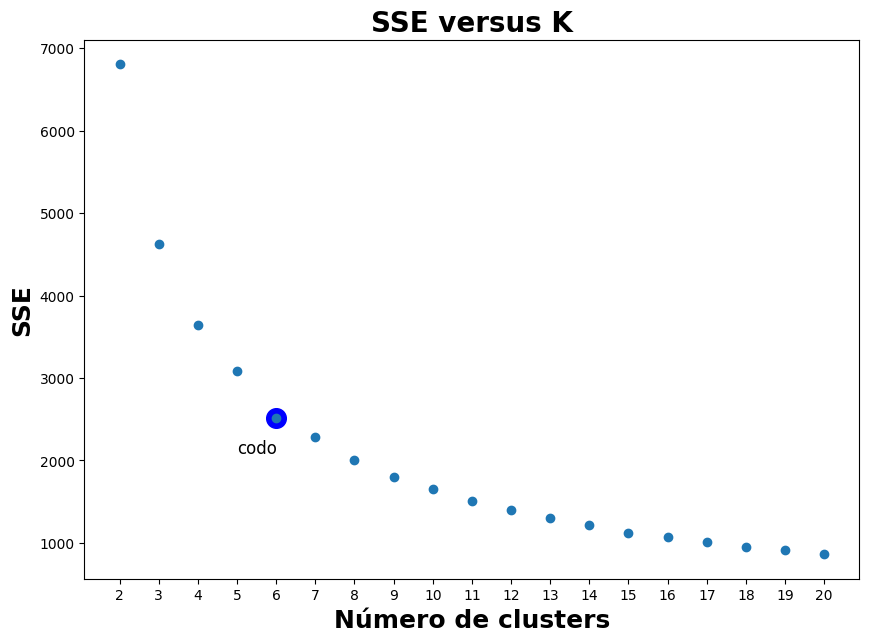

In [ ]:
fig, ax = plt.subplots(figsize = (10, 7))

# estas dos lineas se agregan para que se vea la elección de KneeLocator para el codo en este gráfico
ax.scatter(kl.elbow, sse[kl.elbow-2], color='blue', s=200) # agrega un punto azul al plot de tamaño s=200 en el lugar donde se encuentra el codo
#ax.text(kl.elbow-.5, sse[kl.elbow-2]-25, s="codo")
ax.text(kl.elbow-.5 , sse[kl.elbow-2]-250, s = "codo", ha='center', va='top', fontsize=12) # agrega un texto abajo para indicar qué representa el punto

# estas lineas son el grafico de SS vs K
ax.scatter(range(2, 21), sse)
ax.set_xticks(range(2, 21))
ax.set_xlabel("Número de clusters", fontsize=18, fontweight="bold")
ax.set_ylabel("SSE", fontsize=18, fontweight="bold")
plt.title("SSE versus K", fontsize=20, fontweight="bold")
plt.show()

---
✅ Interpretación

---
+ k = 6 es la cantidad de clusters optimo, despues de este punto no mejora significativamente la agrupacion.
+ SEE = 2510.24 mide la distancia acumulada entre cada punto de datos y el centroide del cluster.
+ El punto codo se utiliza para representar el punto óptimo donde de la relación entre los números de clusteres y el SSE, de esta manera se busca el SSE más bajo posible y sin utilizar una gran cantidad de clústeres.


### Creación y entrenamiento del modelo

In [ ]:
# Primera aplicación de KMeans con las características seleccionadas
kmeans_x= KMeans(n_clusters=kl.elbow, n_init=10, random_state = 29)
grupos = kmeans_x.fit_predict(X_scaled)
data_frame_simple['grupo'] = grupos

### Evaluación del modelo

In [ ]:
# Silhouette Score en espacio seleccionado
silhouette_simple= silhouette_score(X_scaled, grupos)
print(f"Silhouette Score (espacio seleccionado): {silhouette_simple:.4f}")

Silhouette Score (espacio seleccionado): 0.3246


---
✅ **Interpretación**

---

+ Silhouette Score: Mide qué tan bien cada punto de datos se ajusta a su propio grupo (cohesión) en comparación con otros grupos (separación). Un valor cercano a 1 indica una buena agrupación.



+ Con 0.3246: Tiene una estructura algo clara, pero no es ideal. Los clusters existen, pero algunos puntos pueden estar cerca de los bordes entre grupos, lo que indica, posible solapamiento entre clusters.

In [ ]:
# Obtiene los centroides en escala original
centroides_escalados = kmeans_x.cluster_centers_
centroides_originales = scaler.inverse_transform(centroides_escalados)

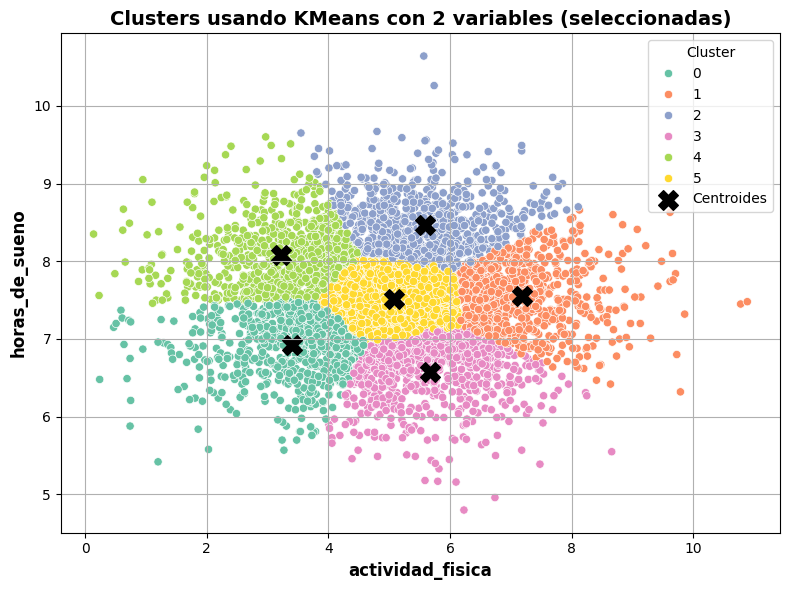

In [ ]:
# Gráfica de los grupos
plt.figure(figsize=(8,6))
sns.scatterplot(data=data_frame_simple, x='actividad_fisica', y='horas_de_sueno', hue='grupo', palette='Set2')
plt.scatter(centroides_originales[:, 0], centroides_originales[:, 1],
            s=200, c='black', marker='X', label='Centroides')
plt.title("Clusters usando KMeans con 2 variables (seleccionadas)", fontsize=14, fontweight="bold")
plt.xlabel("actividad_fisica", fontsize=12, fontweight="bold")
plt.ylabel("horas_de_sueno", fontsize=12, fontweight="bold")
plt.legend(title="Cluster")
plt.grid(True)
plt.tight_layout()
plt.show()

---
✅ **Interpretación**

---

+ Cada punto representa un individuo con un cierto nivel de actividad física y cantidad de horas de sueño. El objetivo del clustering es agrupar personas con características similares en cuanto a esas dos variables.

In [ ]:
df_centroides = pd.DataFrame(centroides_originales, columns=['actividad_fisica', 'horas_de_sueno']).round(2)
df_centroides['cluster'] = range(kl.elbow)
df_centroides

,actividad_fisica,horas_de_sueno,cluster
0,3.40,6.92,0
1,7.19,7.55,1
2,5.60,8.46,2
3,5.67,6.58,3
4,3.22,8.08,4
5,5.08,7.51,5


---
✅ **Interpretación**

---

+ 0 : 	Personas con baja actividad física y sueño medio.

+ 1 : 	Personas con alta actividad física y sueño ligeramente alto. Probablemente las más activas.

+ 2 :  Personas con actividad media-alta y mucho sueño. Quizás las más "equilibradas" en descanso.

+ 3 :  Actividad física media pero menos horas de sueño. Podrían estar en riesgo de fatiga.

+ 4 :   Muy poca actividad física, pero duermen bastante. Podría representar un estilo de vida sedentario.

+ 5 :  	Grupo promedio, actividad y sueño moderados. Probablemente el más representativo o “normal”.


## Modelo de segmentación usando 4 o más variables

### Selección de las variables

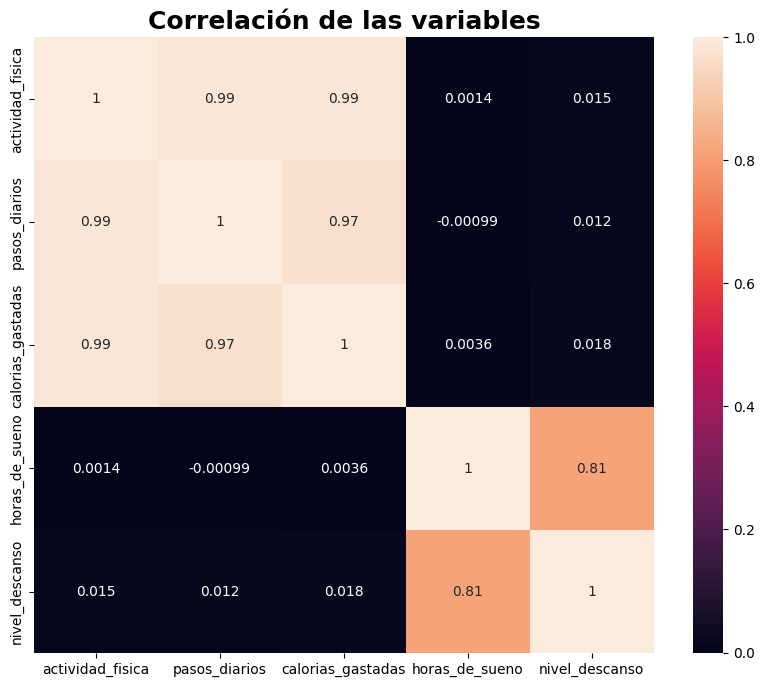

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(data_frame.corr(), annot=True)
plt.title("Correlación de las variables", fontsize=18, fontweight="bold")
plt.show()

---
✅ **Interpretación**

---

+ Variables Escogidas:

  actividad_fisica, nivel_descanso, horas_de_sueno, pasos_diarios

+ Variables descartadas:

  calorias_gastadas

---


+ Se seleccionaron las variables actividad_fisica, nivel_descanso, horas_de_sueno y pasos_diarios con base en el análisis de correlación, buscando evitar redundancia y maximizar la diversidad informativa. Se observó una alta correlación entre actividad_fisica, pasos_diarios y calorias_gastadas (> 0.97), por lo que se eligió  actividad_fisica y pasos_diarios como representante del esfuerzo físico. Por otro lado, nivel_descanso y horas_de_sueno mostraron baja correlación con ese grupo, aportando así una dimensión complementaria centrada en el descanso.

In [ ]:
features = ['actividad_fisica', 'horas_de_sueno', 'nivel_descanso', 'pasos_diarios' ]
data_frame_simple = data_frame[features].copy()

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data_frame_simple)

### Selección de número de clusters óptimo

In [ ]:
sse = []
for k in range(2, 21):
  kkmeans = KMeans(n_clusters=k, n_init="auto", random_state = 29).fit(X_scaled)
  sse.append(kkmeans.inertia_)
kl = KneeLocator(range(2, 21), sse, curve="convex", direction="decreasing")

print("El codo está en k =", kl.elbow)
print("El SSE =", np.round(kl.all_elbows_y, 2))

El codo está en k = 7
El SSE = [5362.74]


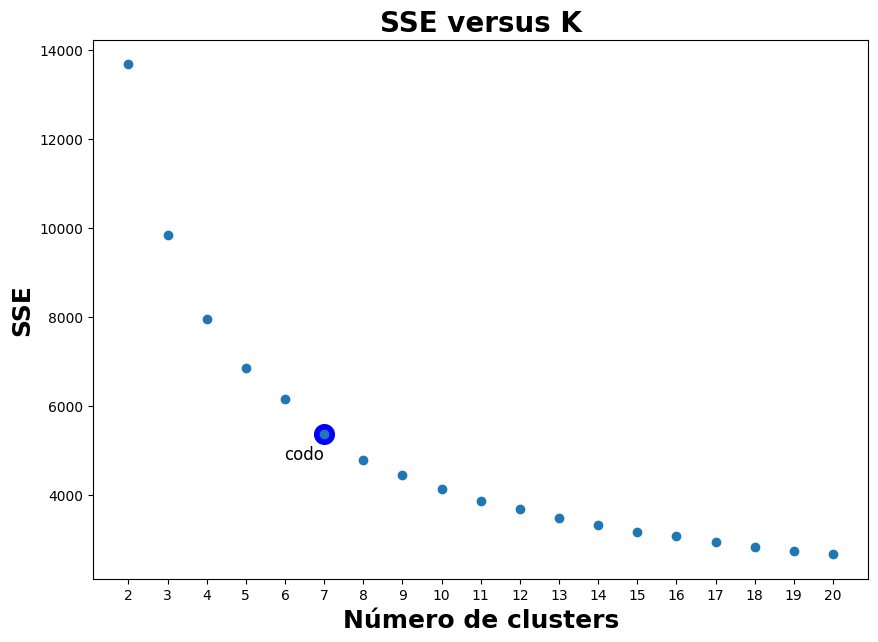

In [ ]:
fig, ax = plt.subplots(figsize = (10, 7))

# estas dos lineas se agregan para que se vea la elección de KneeLocator para el codo en este gráfico
ax.scatter(kl.elbow, sse[kl.elbow-2], color='blue', s=200) # agrega un punto rojo al plot de tamaño s=200 en el lugar donde se encuentra el codo
ax.text(kl.elbow-.5 , sse[kl.elbow-2]-250, s = "codo", ha='center', va='top', fontsize=12) # agrega un texto abajo para indicar qué representa el punto

# estas lineas son el grafico de SS vs K
ax.scatter(range(2, 21), sse)
ax.set_xticks(range(2, 21))
ax.set_xlabel("Número de clusters", fontsize=18, fontweight="bold")
ax.set_ylabel("SSE", fontsize=18, fontweight="bold")
plt.title("SSE versus K", fontsize=20, fontweight="bold")
plt.show()


---
✅ Interpretación

---
+ Aumentaron la cantidad de Clusters (k = 7) y la Suma de Errores Cuadrados (SEE = 5362.74), debido a que al agregar más variables al modelo crecio la dimension y se genero mayor 'espacio' entre los puntos.


+ El punto marcado como “codo” tiene la misma función que la vez anterior. Es el punto optimo donde se minimiza el SSE y no se usa tantos clústeres.

### Creación y entrenamiento del modelo

In [ ]:
# Primera aplicación de KMeans con los datos originales
kmeans_inicial = KMeans(n_clusters=kl.elbow, n_init=10, random_state = 29)
grupos = kmeans_inicial.fit_predict(X_scaled)
data_frame_simple['grupo'] = grupos

### Evaluación del modelo

In [ ]:
# Silhouette Score en espacio original
silhouette_orig = silhouette_score(X_scaled, grupos)
print(f"Silhouette Score (espacio original): {silhouette_orig:.4f}")

Silhouette Score (espacio original): 0.2666


In [ ]:
centroides_all = kmeans_inicial.cluster_centers_
print(centroides_all)

[[-0.46433223  1.30274706  1.30366026 -0.47151277]
 [ 0.40222406 -1.29362872 -1.30039678  0.40391099]
 [ 0.85987099  0.96436985  0.94702187  0.85632945]
 [-1.00939252 -0.96247448 -1.00245564 -1.00875717]
 [-1.46065051  0.37172429  0.36935259 -1.45698465]
 [ 1.45810989 -0.25409634 -0.2370193   1.45927732]
 [-0.02379009 -0.04616004 -0.01973092 -0.0217487 ]]


In [ ]:
# Obtiene los centroides en escala original
centroides_all_originales = scaler.inverse_transform(centroides_all)

In [ ]:
df_all_centroides = pd.DataFrame(centroides_all_originales, columns=['actividad_fisica', 'horas_de_sueno', 'nivel_descanso', 'pasos_diarios']).round(2)
df_all_centroides['cluster'] = range(kl.elbow)
df_all_centroides

,actividad_fisica,horas_de_sueno,nivel_descanso,pasos_diarios,cluster
0,4.31,8.43,86.01,8582.89,0
1,5.61,6.60,64.06,11235.97,1
2,6.29,8.19,83.01,12607.08,2
3,3.50,6.84,66.58,6954.70,3
4,2.83,7.77,78.14,5596.29,4
5,7.19,7.33,73.03,14434.40,5
6,4.97,7.48,74.86,9945.96,6


---
✅ Interpretación

---

+ Cluster 2 parece el más equilibrado y saludable: duerme bien, se siente descansado y tiene buena actividad.

+ Clusters 1 y 3 reflejan personas con problemas de descanso, a pesar de que en el caso de Cluster 1 hay bastante movimiento.

+ Cluster 5 representa a los hiperactivos, pero tal vez con algo de déficit de descanso.

+ Cluster 4 destaca por dormir bien pese a su vida sedentaria.

+ Cluster 6 es el más "normal": balance entre todas las variables.

### Aplicación de PCA


Varianza explicada por cada componente:
Componente 1: 0.4968  |  Acumulada: 0.4968
Componente 2: 0.4529  |  Acumulada: 0.9497
Componente 3: 0.0468  |  Acumulada: 0.9965
Componente 4: 0.0035  |  Acumulada: 1.0000


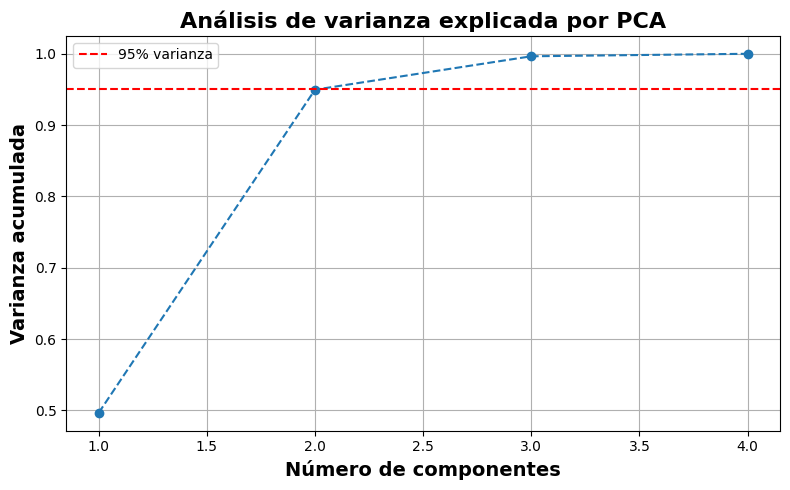


Número de componentes que explican >=95.0% de la varianza: 3


In [ ]:
# Escriba su código acá
# Análisis de varianza explicada por PCA
pca_full = PCA()
X_pca_full = pca_full.fit_transform(X_scaled)

# Varianza explicada por cada componente
varianza_explicada = pca_full.explained_variance_ratio_
varianza_explicada_acumulada = np.cumsum(varianza_explicada)

# Mostrar tabla con varianza explicada
print("\nVarianza explicada por cada componente:")
for i, (v_ind, v_acum) in enumerate(zip(varianza_explicada, varianza_explicada_acumulada), 1):
    print(f"Componente {i}: {v_ind:.4f}  |  Acumulada: {v_acum:.4f}")

# Visualizar varianza acumulada
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(varianza_explicada) + 1), varianza_explicada_acumulada, marker='o', linestyle='--')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% varianza')
plt.xlabel('Número de componentes', fontsize=14, fontweight="bold")
plt.ylabel('Varianza acumulada', fontsize=14, fontweight="bold")
plt.title('Análisis de varianza explicada por PCA', fontsize=16, fontweight="bold")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Elegir número óptimo de componentes (>= 95% varianza)
umbral = 0.95
n_componentes_optimos = np.argmax(varianza_explicada_acumulada >= umbral) + 1
print(f"\nNúmero de componentes que explican >={umbral*100}% de la varianza: {n_componentes_optimos}")

---
✅Interpretación

---
+ Se aplicó Análisis de Componentes Principales (PCA) sobre los datos estandarizados con el objetivo de reducir la dimensionalidad y facilitar la segmentación. El análisis de la varianza explicada acumulada mostró que con solo 3 componentes principales ya superaba el umbral estándar del 95%. Por tanto, se retendrán 3 componentes para representar adecuadamente la estructura de los datos sin pérdida significativa de información.

-------------------------------------------------------
Porcentaje de varianza explicada por cada componente
-------------------------------------------------------
[0.49678515 0.45286964 0.04684732 0.00349789]


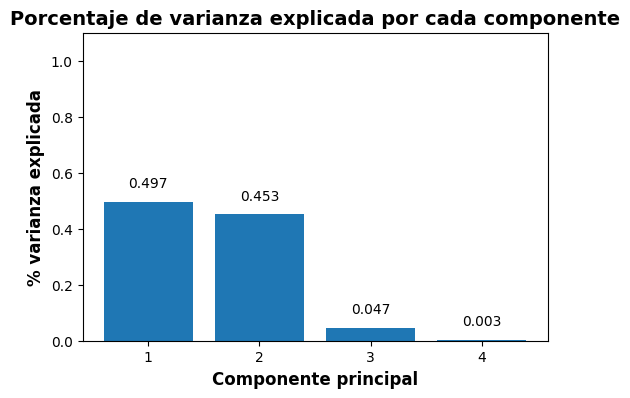

In [ ]:
print('-'*55)
print('Porcentaje de varianza explicada por cada componente')
print('-'*55)
print(pca_full.explained_variance_ratio_)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(
    x      = np.arange(pca_full.n_components_) + 1,
    height = pca_full.explained_variance_ratio_
)

for x, y in zip(np.arange(len(features)) + 1, pca_full.explained_variance_ratio_):
    label = round(y, 3)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(pca_full.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente', fontsize=14, fontweight="bold")
ax.set_xlabel('Componente principal', fontsize=12, fontweight="bold")
ax.set_ylabel('% varianza explicada', fontsize=12, fontweight="bold");

---
✅ Interpretación

---
- Se observa que los dos primeros componentes principales (PC1 y PC2) explican juntos aproximadamente el 95% de la varianza total de los datos. Esto indica que la mayor parte de la información contenida en las 4 variables originales puede ser representada en un espacio bidimensional sin pérdida significativa de información.

- En cambio, los componentes PC3 y PC4 apenas explican el 4.7% y 0.3% de la varianza, respectivamente, lo cual sugiere que no aportan información relevante adicional. Por esta razón, es válido reducir la dimensionalidad del dataset de 4 a 2 dimensiones.

- Esta reducción no solo simplifica el análisis, sino que también mejora la interpretación de los clusters formados y reduce el ruido o la redundancia entre las variables originales.

In [ ]:
# Aplicar PCA con número óptimo de componentes obtenido en el punto anterior
pca = PCA(n_components=n_componentes_optimos)
X_pca = pca.fit_transform(X_scaled)

Silhouette Score (espacio PCA): 0.2710


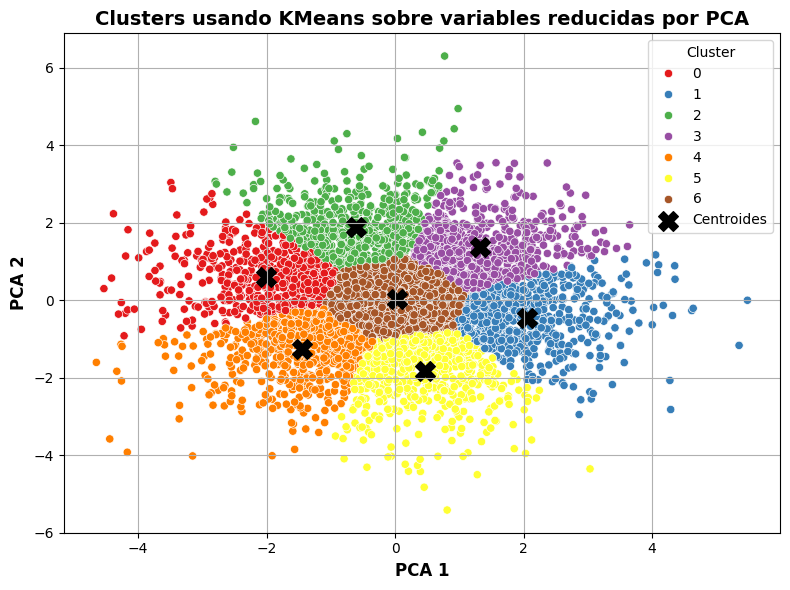

In [ ]:

# KMeans sobre las componentes principales
kmeans_pca = KMeans(n_clusters=kl.elbow, n_init=10, random_state=29)
clusters_pca = kmeans_pca.fit_predict(X_pca)

# Visualización del resultado de aplicar KMeans sobre PCA
data_frame_simple['cluster_pca'] = clusters_pca

silhouette_pca = silhouette_score(X_pca, clusters_pca)
print(f"Silhouette Score (espacio PCA): {silhouette_pca:.4f}")

# Obtener los centroides en el espacio PCA
centroides_pca = kmeans_pca.cluster_centers_

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=clusters_pca, palette='Set1')
plt.scatter(centroides_pca[:, 0], centroides_pca[:, 1],
            s=200, c='black', marker='X', label='Centroides')
plt.title("Clusters usando KMeans sobre variables reducidas por PCA", fontsize=14, fontweight="bold")
plt.xlabel("PCA 1", fontsize=12, fontweight="bold")
plt.ylabel("PCA 2", fontsize=12, fontweight="bold")
plt.legend(title="Cluster")
plt.grid(True)
plt.tight_layout()
plt.show()

---
✅ Interpretación

---
  + Tras reducir las variables originales mediante PCA (superando el 96% de la varianza con solo 3 componentes), se aplicó el algoritmo de KMeans para segmentar a los usuarios. Se determinaron 7 clústeres, los cuales fueron visualizados en el espacio reducido utilizando únicamente las dos primeras componentes principales (PC1 y PC2), que explican en conjunto alrededor del 95% de la varianza.

  + La visualización muestra clústeres relativamente diferenciados, con centroides bien posicionados.

  + El valor del Silhouette Score de 0.271 indica que la segmentación lograda en el espacio reducido por PCA tiene una definición moderadamente baja. Aunque existe una cierta estructura de agrupación, los límites entre los clusters no son completamente claros, lo cual sugiere que algunos datos podrían solaparse entre grupos o que el modelo no logra separar con precisión ciertos perfiles de usuarios.

  + Esta segmentación es útil para visualizar la diversidad de perfiles de usuarios, pero se sugiere seguir evaluando diferentes cantidades de clústeres o incorporar más componentes si se desea mejorar la separación.

In [ ]:
# --- Comparación ---
print("Porcentaje de varianza explicada por PCA:\n", pca.explained_variance_ratio_)
print("-"*75)
print("Centroides en espacio original:\n", kmeans_inicial.cluster_centers_)
print("-"*75)
print("Centroides en espacio PCA:\n", kmeans_pca.cluster_centers_)

Porcentaje de varianza explicada por PCA:
 [0.49678515 0.45286964 0.04684732]
---------------------------------------------------------------------------
Centroides en espacio original:
 [[-0.46433223  1.30274706  1.30366026 -0.47151277]
 [ 0.40222406 -1.29362872 -1.30039678  0.40391099]
 [ 0.85987099  0.96436985  0.94702187  0.85632945]
 [-1.00939252 -0.96247448 -1.00245564 -1.00875717]
 [-1.46065051  0.37172429  0.36935259 -1.45698465]
 [ 1.45810989 -0.25409634 -0.2370193   1.45927732]
 [-0.02379009 -0.04616004 -0.01973092 -0.0217487 ]]
---------------------------------------------------------------------------
Centroides en espacio PCA:
 [[-2.01652299e+00  5.94400814e-01  1.83642698e-02]
 [ 2.05649488e+00 -4.51562859e-01 -3.68769478e-03]
 [-6.12650369e-01  1.89991220e+00  1.01725894e-02]
 [ 1.32322098e+00  1.36632483e+00 -1.94679237e-02]
 [-1.44697077e+00 -1.26500822e+00 -1.69147868e-02]
 [ 4.60546902e-01 -1.83275125e+00  5.50179072e-04]
 [ 3.41561842e-02  2.88853657e-02  8.08452993

---
✅ Interpretación

---

+ Cluster 2 en espacio original:

| Variable              | Z-score | Significado                                    |
| --------------------- | ------- | ---------------------------------------------- |
| **actividad\_física** | +0.8599 | Hacen **más actividad física** que el promedio |
| **horas\_de\_sueño**  | +0.9644 | Duermen **más horas** que el promedio          |
| **nivel\_descanso**   | +0.9470 | Tienen una **alta calidad de descanso**        |
| **pasos\_diarios**    | +0.8563 | Caminan **más que el promedio**                |


+ Personas activas, con buenos hábitos de sueño y descanso. Representan un perfil saludable y equilibrado